## Product Recommendation Systems

### Domain - E-commerce

### Context - 
Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues,product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.

### Data Description -
Data columns- First three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

### Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) 
The repository has several datasets. For this case study, we are using the Electronics dataset.

### Objective - 
To make a recommendation system that recommends at least five(5) new products based on the user's habits.

### Import Libraries

In [1]:
import pandas as pd
from math import sqrt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans

from collections import defaultdict

In [2]:
# Load the dataset and Read first 5 rows
electronics_df = pd.read_csv('ratings_Electronics.csv',header=None,names=['userId', 'productId', 'Rating','timestamp'])
electronics_df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
print ("Rows     : " ,electronics_df.shape[0])
print ("Columns  : " ,electronics_df.shape[1])
print ("\nFeatures : \n" ,electronics_df.columns.tolist())
print("\n DataType : \n",electronics_df.dtypes)
print ("\nUnique values of userId :  \n",electronics_df.userId.nunique())
print ("\nUnique values of productId :  \n",electronics_df.productId.nunique())

Rows     :  7824482
Columns  :  4

Features : 
 ['userId', 'productId', 'Rating', 'timestamp']

 DataType : 
 userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

Unique values of userId :  
 4201696

Unique values of productId :  
 476002


In [4]:
# check missing values.
electronics_df.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

In [5]:
#We can discard the timestamp column as in this case you may not need to use it.
electronics_df.drop('timestamp',axis=1,inplace=True)
electronics_df.head(7)

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0


In [6]:
# Check if there are any duplicate rows
electronics_df[electronics_df.duplicated(keep = 'first')]

,userId,productId,Rating


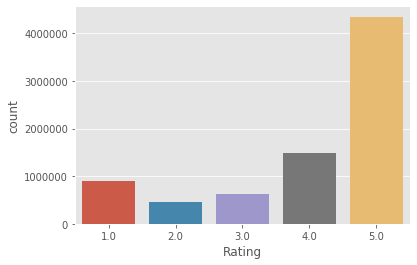

In [7]:
#plotting count of rating
sns.countplot(data=electronics_df , x='Rating')
plt.show()

In [8]:
electronics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


### Take a subset of the dataset to make it less sparse/ denser. ( For example,keep the users only who has given 50 or more number of ratings )

In [9]:
electronics_df_filt = pd.DataFrame(electronics_df.groupby('userId')['Rating'].count())
electronics_df_filt.head()

,Rating
userId,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1


In [10]:
query = electronics_df_filt[electronics_df_filt['Rating'] >= 50].index
electronics_df =  electronics_df[electronics_df['userId'].isin(query)]
electronics_df.head()

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [11]:
print ("Rows     : " ,electronics_df.shape[0])
print ("Columns  : " ,electronics_df.shape[1])
print ("\nFeatures : \n" ,electronics_df.columns.tolist())
print("\n DataType : \n",electronics_df.dtypes)
print ("\nUnique values of userId :  \n",electronics_df.userId.nunique())
print ("\nUnique values of productId :  \n",electronics_df.productId.nunique())

Rows     :  125871
Columns  :  3

Features : 
 ['userId', 'productId', 'Rating']

 DataType : 
 userId        object
productId     object
Rating       float64
dtype: object

Unique values of userId :  
 1540

Unique values of productId :  
 48190


In [12]:
#Checking missing values in dataframe
electronics_df.isna().sum()

userId       0
productId    0
Rating       0
dtype: int64

In [13]:
electronics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,125871.0,4.261339,1.062144,1.0,4.0,5.0,5.0,5.0


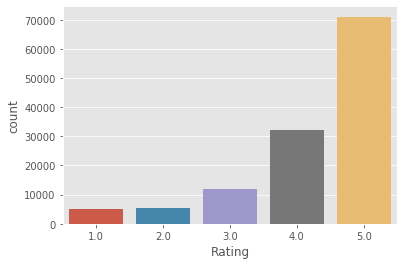

In [14]:
#plotting count of rating
sns.countplot(data=electronics_df , x='Rating')
plt.show()

In [15]:
#Top 10 products based on # of ratings given
electronics_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head(10)

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
Name: Rating, dtype: int64

In [16]:
#Top 10 users based on # of ratings given
electronics_df.groupby('userId')['Rating'].count().sort_values(ascending=False).head(10)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: Rating, dtype: int64

In [17]:
ratings = pd.DataFrame(electronics_df.groupby('productId')['Rating'].mean())
ratings.head()

,Rating
productId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333


In [18]:
ratings['num of ratings'] = pd.DataFrame(electronics_df.groupby('productId')['Rating'].count())
ratings.head()

,Rating,num of ratings
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


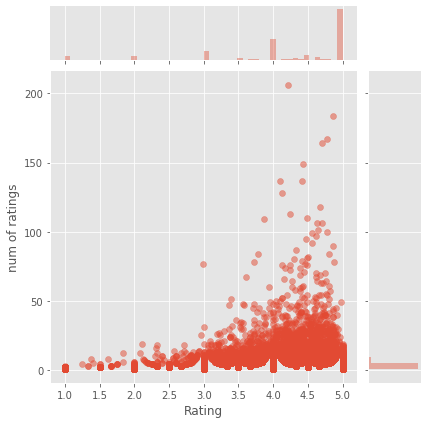

In [19]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

In [20]:
from sklearn.model_selection import train_test_split

In [35]:
#Splitting Train : Test data in 70:30 ratio
train_data, test_data = train_test_split(electronics_df, test_size = 0.30, random_state=42)
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (88109, 3)
Shape of testing data:  (37762, 3)


### Popularity-Based Recommendation Engine
The most simplest recommendation engine is the Popularity-Based. It works by recommending products viewed/purchased by most people and rated high. The code to develop this kind of recommendation is extremely easy and is effectively just a summarization procedure that determine which products have the most users.

In [42]:
class popularity_recommender():
    def __init__(self):
        self.train_data = None
        self.test_data = None
        self.userId = None
        self.productId = None
        self.popularity_recommendation = None
        
    def create(self, train_data, test_data, userId, productId):
        self.train_data = train_data
        self.test_data = test_data
        self.userId = userId
        self.productId = productId
        
        #Get a count of user_ids for each unique product as recommendation score
        train_data_grp = self.train_data.groupby([self.productId]).agg({self.userId:'count'}).reset_index()
        train_data_grp.rename(columns = {'userId': 'score'},inplace=True)            

        #Sort the products based upon recommendation score
        train_data_sort = train_data_grp.sort_values(['score', self.productId], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=False, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head()
        
    def recommend(self,userId,n=5):
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

    def metrics(self):  
        self.test_data = test_data
        ratings = pd.DataFrame(self.train_data.groupby(self.productId)['Rating'].mean())
        
        pred_ratings = [];            
        for data in self.test_data.values:
            if(data[1] in (ratings.index)):
                pred_ratings.append(ratings.loc[data[1]])
            else:
                pred_ratings.append(0)
                
        #Calculate RMSE
        mse = mean_squared_error(self.test_data['Rating'], pred_ratings)
        rmse = round(sqrt(mse),3)
        return rmse

In [43]:
test_data['userId'].head(5)

10902      A2NB2E5DXE319Z
2733358    A1TY97ZGQT5FGF
2931889    A2L42QEWR77PKZ
1315929    A3OYO7B6SS7QLH
2885925    A32AK8FOAZEPE2
Name: userId, dtype: object

In [44]:
popularity = popularity_recommender()
popularity.create(train_data, test_data, 'userId', 'productId')

print('\n Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"')
user_id = "A2NB2E5DXE319Z"
result = popularity.recommend(user_id)
print(result)


 Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"
              user_id   productId  score  Rank
30892  A2NB2E5DXE319Z  B0088CJT4U    145   1.0
30338  A2NB2E5DXE319Z  B007WTAJTO    127   2.0
19570  A2NB2E5DXE319Z  B003ES5ZUU    125   3.0
8662   A2NB2E5DXE319Z  B000N99BBC    113   4.0
30604  A2NB2E5DXE319Z  B00829TIEK     99   5.0


In [45]:
print('\n Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"')
user_id = "A1TY97ZGQT5FGF"
result = popularity.recommend(user_id)
print(result)


 Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"
              user_id   productId  score  Rank
30892  A1TY97ZGQT5FGF  B0088CJT4U    145   1.0
30338  A1TY97ZGQT5FGF  B007WTAJTO    127   2.0
19570  A1TY97ZGQT5FGF  B003ES5ZUU    125   3.0
8662   A1TY97ZGQT5FGF  B000N99BBC    113   4.0
30604  A1TY97ZGQT5FGF  B00829TIEK     99   5.0


In [46]:
print('\n Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"')
user_id = "A2L42QEWR77PKZ"
result = popularity.recommend(user_id)
print(result)


 Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"
              user_id   productId  score  Rank
30892  A2L42QEWR77PKZ  B0088CJT4U    145   1.0
30338  A2L42QEWR77PKZ  B007WTAJTO    127   2.0
19570  A2L42QEWR77PKZ  B003ES5ZUU    125   3.0
8662   A2L42QEWR77PKZ  B000N99BBC    113   4.0
30604  A2L42QEWR77PKZ  B00829TIEK     99   5.0


In [47]:
RMSE = popularity.metrics()
print('The RMSE value for Popularity Recommender model is', RMSE)

The RMSE value for Popularity Recommender model is 2.495


 <font color=green> We can see that this model recommends same products to all the users. The drawbacks with this model is that it doesn't offer personalized recommendation .However, It would easier to recommend products to a new user without having knowledge about who the users are or what their preferences are and recommending them the products that are popular.

### Collaborative Filtering
Collaborative Filtering builds a model from a user's past behavior, activities, or
preferences and makes recommendations to the user based upon
similarities to other users

# 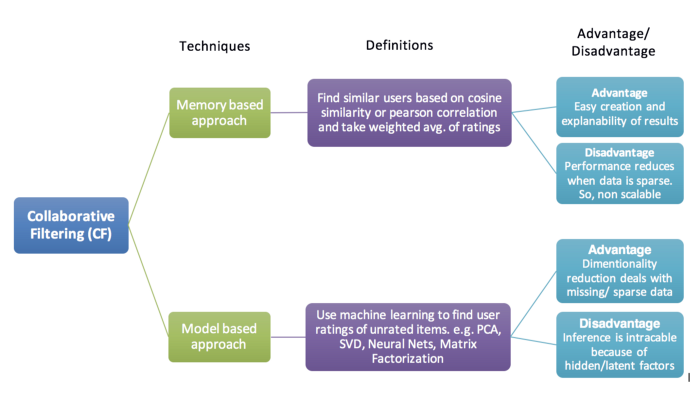

### Memory based collaborative Filtering

The memory-based approach takes user rating data to compute similarities between users and items in order to make a 
recommendation. The most famous memory-based approach are neighborhood-based algorithms. Neighborhood-based algorithms
focus on computing the relationship between either items or users. Here a recommendation for a user is predicted based
upon ratings of similar (or neighboring) items by the same user.The neighborhood-based algorithm calculates the similarity 
between two users or items then producing a prediction for the user by taking the weighted average of all ratings.

# 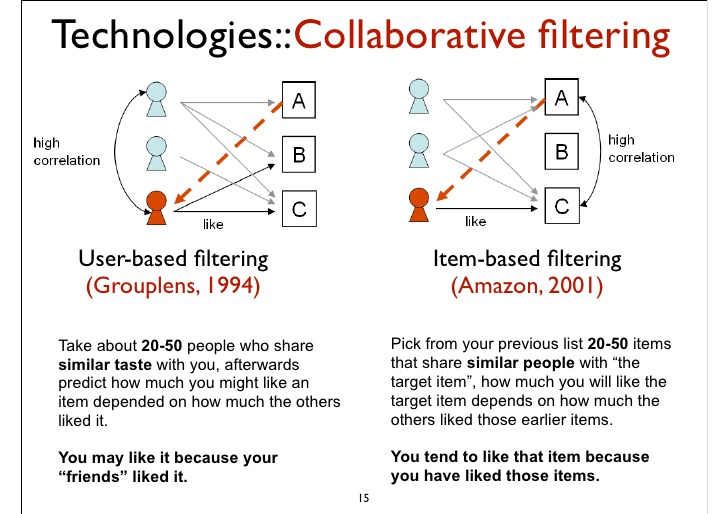

In [48]:
#To load a dataset from a pandas dataframe, you will need the load_from_df() method. 
#The Reader class is used to parse a file containing ratings. Default scale is from 1 to 5.
reader = Reader()
surprise_data = Dataset.load_from_df(electronics_df, reader)

In [49]:
#Split a dataset into trainset and testset.
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=.30)

In [50]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [61]:
class collaborative_recommender():
    def __init__(self):
        self.data = None
        self.trainset = None
        self.testset = None
        self.userId = None
        self.productId = None
        self.model = None
        self.params = None
        self.user_recommendations = None
        
    def create(self,data,trainset,testset,userId,productId,model,params):
        self.data = data
        self.trainset = trainset
        self.userId = userId
        self.productId = productId
        self.testset = testset
        self.model = model
        self.params = params           
        
        #Fit the model
        rs = RandomizedSearchCV(self.model, self.params, n_jobs=-1, measures=['rmse'])
        rs.fit(data)
        # best RMSE score
        print('Best Score:', rs.best_score['rmse'])
        # combination of parameters that gave the best RMSE score
        print('Best Params:', rs.best_params['rmse'])
        # We can now use the algorithm that yields the best rmse:
        algo = rs.best_estimator['rmse']   
        
        #Cross Validation
        cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
        
        # Train on train_data
        algo.fit(self.trainset)

        # Compute RMSE on Test Data
        predictions = algo.test(self.testset)
        rmse = round(accuracy.rmse(predictions), 3)
        print('The RMSE value for model is ',rmse)             
        
        top_n = get_top_n(predictions, n=5)
        self.user_recommendations = pd.DataFrame(columns=['userId', 'productId', 'Rating'])
        # Print the recommended items for each user
        for item in top_n:
            df = pd.DataFrame(top_n[item], columns=['productId', 'Rating'])
            df[self.userId] = item
            cols = df.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            df = df[cols]
            self.user_recommendations = pd.concat([self.user_recommendations, df], axis = 0)
            
    def recommend(self, userId):
        df = self.user_recommendations[self.user_recommendations['userId'] == userId].head()
        print(df)
        

In [62]:
from surprise.model_selection import RandomizedSearchCV
#name contains the similarity metric to use. Options are cosine, msd, pearson, or pearson_baseline. The default is msd.
#user_based is a boolean that tells whether the approach will be user-based or item-based.
# The default is True, which means the user-based approach will be used.
#min_support is the minimum number of common items needed between users to consider them for similarity.
#For the item-based approach, this corresponds to the minimum number of common users for two items.
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}

In [63]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
#model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
collab = collaborative_recommender()

In [64]:
collab.create(surprise_data, trainset, testset, 'userId', 'productId', KNNWithMeans, params)

Best Score: 1.0367827543933736
Best Params: {'k': 46, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': True}}
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0309  1.0363  1.0349  1.0340  1.0411  1.0354  0.0033  
MAE (testset)     0.7723  0.7763  0.7747  0.7750  0.7806  0.7758  0.0027  
Fit time          0.65    0.53    0.53    0.51    0.51    0.55    0.05    
Test time         0.64    0.62    0.64    0.66    0.63    0.64    0.01    
Computing the pearson similarity matrix...
Done c

In [65]:
print('\n Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"')
collab.recommend(userId='A2NB2E5DXE319Z')


 Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"
           userId   productId   Rating
0  A2NB2E5DXE319Z  B00946XHI8        5
1  A2NB2E5DXE319Z  B005CLPP8E        5
2  A2NB2E5DXE319Z  B00DWMPM92        5
3  A2NB2E5DXE319Z  B005C6CVAE  4.39815
4  A2NB2E5DXE319Z  B0000B006W  4.39815


In [66]:
print('\n Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"')
collab.recommend(userId='A1TY97ZGQT5FGF')


 Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"
           userId   productId   Rating
0  A1TY97ZGQT5FGF  B000C29HP0  4.26315
1  A1TY97ZGQT5FGF  B003GJFMAA  4.26315
2  A1TY97ZGQT5FGF  B004Y4ZG5W  4.26315
3  A1TY97ZGQT5FGF  B004HO58OI  4.26315
4  A1TY97ZGQT5FGF  B001Q1HUIW  4.26315


In [67]:
print('\n Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"')
collab.recommend(userId='A2L42QEWR77PKZ')


 Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"
           userId   productId   Rating
0  A2L42QEWR77PKZ  B00009XT3H  4.35211
1  A2L42QEWR77PKZ  B000QYEN1W  4.35211
2  A2L42QEWR77PKZ  B00425S1H8  4.35211
3  A2L42QEWR77PKZ  B006ZP8UOW  4.35211
4  A2L42QEWR77PKZ  B0002D6QJO  4.35211


### Model based collaborative Filtering

Model-based (or matrix factorization based) methods build models based on modern machine learning algorithms discovering patterns in the training data. The models are then used to make predictions on real data. Model-based approaches uncover
latent factors which can be used to construct the training data ratings. Model-based methods have become widely popular as they handle sparsity better than their memory-based counterparts while improving prediction accuracy.

SVD is a Matrix Factorization techniques are usually more effective because they allow us to discover the latent features underlying the interactions between users and items.

In [68]:
collab = collaborative_recommender()

In [69]:
#n_epochs is the number of iterations of SGD, which is basically an iterative method used in Statistics to minimize a function.
#lr_all is the learning rate for all parameters, which is a parameter that decides how much the parameters are adjusted in each 
# iteration.
#reg_all is the regularization term for all parameters, which is a penalty term added to prevent overfitting.

params = {
    "n_epochs": [5, 10, 15],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.01, 0.1, 0.4, 0.6]
}

In [70]:
collab.create(surprise_data, trainset, testset, 'userId', 'productId', SVD, params)

C:\Users\gurup\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Score: 0.9803806986046812
Best Params: {'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.1}
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9871  0.9793  0.9821  0.9751  0.9815  0.9810  0.0039  
MAE (testset)     0.7332  0.7278  0.7309  0.7243  0.7322  0.7297  0.0032  
Fit time          7.52    6.93    7.12    6.49    6.33    6.88    0.43    
Test time         0.28    0.26    0.27    0.23    0.28    0.26    0.02    
RMSE: 0.9814
The RMSE value for model is  0.981


In [71]:
print('\n Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"')
collab.recommend(userId='A2NB2E5DXE319Z')


 Make recommendation for the user id selected from the testset = "A2NB2E5DXE319Z"
           userId   productId    Rating
0  A2NB2E5DXE319Z  B00IVPU6AA  4.885096
1  A2NB2E5DXE319Z  B0000BZL1P  4.802538
2  A2NB2E5DXE319Z  B004KPLNO8  4.643559
3  A2NB2E5DXE319Z  B0000B006W  4.634917
4  A2NB2E5DXE319Z  B000CKVOOY  4.594078


In [72]:
print('\n Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"')
collab.recommend(userId='A1TY97ZGQT5FGF')


 Make recommendation for the user id selected from the testset = "A1TY97ZGQT5FGF"
           userId   productId    Rating
0  A1TY97ZGQT5FGF  B003SQEAY0  3.013762
1  A1TY97ZGQT5FGF  B0042SGDVG  2.804361
2  A1TY97ZGQT5FGF  B000TXEE14  2.726526
3  A1TY97ZGQT5FGF  B000Z3VSOE  2.723263
4  A1TY97ZGQT5FGF  B000C29HP0  2.681537


In [73]:
print('\n Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"')
collab.recommend(userId='A2L42QEWR77PKZ')


 Make recommendation for the user id selected from the testset = "A2L42QEWR77PKZ"
           userId   productId    Rating
0  A2L42QEWR77PKZ  B001MSU1FS  4.869528
1  A2L42QEWR77PKZ  B001QUA6RA  4.800263
2  A2L42QEWR77PKZ  B0002D6QJO  4.566759
3  A2L42QEWR77PKZ  B00CMEN95U  4.515616
4  A2L42QEWR77PKZ  B00425S1H8  4.452672


## Summarise your insights.

### Popularity based recommendation system
   These recommendation systems are generalized and the simplest form of recommedation model.They are commonly used when we have no prior information regarding the user, hence we recommend user according to the popular products.Therefore this is a non-personalized recommendation system and will have same recommendations for all the users.The RMSE value for Popularity Recommender model is 2.495. 

### Collaborative Filtering Recommendation system
 These  recommendation systems are personalized models.It utilizes the user’s behaviour or information to recommend items/ content accordingly.Therefore, for each user the items recommended would be different which depends on their preferences.
One of the limitations of the method is cold-start problem.

### KNNWithMeans

In [ ]:
                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0309  1.0363  1.0349  1.0340  1.0411  1.0354  0.0033  
MAE (testset)     0.7723  0.7763  0.7747  0.7750  0.7806  0.7758  0.0027  
Fit time          0.65    0.53    0.53    0.51    0.51    0.55    0.05    
Test time         0.64    0.62    0.64    0.66    0.63    0.64    0.01    
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0331
The RMSE value for model is  1.033

### SVD

In [ ]:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9871  0.9793  0.9821  0.9751  0.9815  0.9810  0.0039  
MAE (testset)     0.7332  0.7278  0.7309  0.7243  0.7322  0.7297  0.0032  
Fit time          7.52    6.93    7.12    6.49    6.33    6.88    0.43    
Test time         0.28    0.26    0.27    0.23    0.28    0.26    0.02    
RMSE: 0.9814
The RMSE value for model is  0.981


<font color=blue> SVD is better model compared to KNN or Popularity with a better RMSE value of 0.981. We can also see the products that are recommended in SVD is different to that of KNNWithMeans as SVD uses matrix factorization. 